# KNN Classification

[Coding Elements](http://www.codingelements.com)

In [1]:
import math 

a = [1, 2, 3]
b = [4, 5, 6]

# Scalar

sum = 0
for i in range(len(a)):
    sum += (a[i] - b[i]) ** 2
dist = sum ** 0.5
print(dist)

5.196152422706632


In [2]:
import numpy as np

# Vector 

a = [1, 2, 3]
b = [4, 5, 6]

a = np.array(a)
b = np.array(b)
dist = (np.sum((b-a)**2))**0.5
dist

5.196152422706632

# KNN

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
mean1 = np.array([1, 0])
cov1 = np.array([[1, 0.1], [0.1, 1.2]])
dist1 = np.random.multivariate_normal(mean1, cov1, 500)

mean2 = np.array([4, 5])
cov2 = np.array([[1, 0.1], [0.1, 1.2]])
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

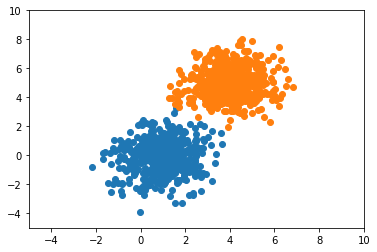

In [5]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.scatter(dist1[:, 0], dist1[:, 1])
plt.scatter(dist2[:, 0], dist2[:, 1])
plt.show()

In [6]:
data = np.zeros((1000, 3))

data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1.0

print(data.shape)
data.mean(axis=0)

(1000, 3)


array([2.47898989, 2.46136327, 0.5       ])

In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 0.70942592  0.13939784  0.        ]
 [ 3.41559261  7.41095689  1.        ]
 [-0.28994432 -0.37541453  0.        ]
 [ 2.3487132   0.22079575  0.        ]
 [ 2.61666658 -1.13184272  0.        ]
 [ 2.48594072  6.02119992  1.        ]
 [ 4.45296911  7.90028699  1.        ]
 [ 0.4232925  -1.12083284  0.        ]
 [ 2.00924751 -0.32110567  0.        ]
 [ 5.94938116  6.83611533  1.        ]]


In [8]:
def distance(a, b):
    dist = (np.sum((b-a)**2))**0.5
    return dist

In [17]:
def knn(x_train, y_train, test_point, k=7):
    vals = []
    
    for i in range(x_train.shape[0]):
        d = distance(x_train[i], test_point)
        vals.append([d, y_train[i]])
        
    sorted_labels = sorted(vals, key=lambda r: r[0])
    neighbors = np.asarray(sorted_labels)[:k, -1]
#     print(neighbors)
    
    freq = np.unique(neighbors, return_counts=True)
    
    index = freq[1].argmax()
    return freq[0][index]

In [11]:
x_train = data[:, :2]
y_train = data[:, -1]
test_point = np.array([2, 3])

print(knn(x_train, y_train, test_point))

[1. 0. 1. 0. 1. 1. 1.]
1.0


In [12]:
np.random.shuffle(data)

split = int(0.75 * data.shape[0])

x_train = data[:split, :2]
y_train = data[:split, -1]

x_test = data[split:, :2]
y_test = data[split:, -1]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [15]:
def acc(k):
    
    predictions = []
    
    for i in range(x_test.shape[0]):
        test_point = x_test[i]
        predicted_label = knn(x_train, y_train, test_point, k)
        predictions.append(predicted_label)
        
    print(y_test == preds)
        
    preds = np.asarray(predictions)
    return 100 * (y_test == preds).sum() / preds.shape[0]
    

In [19]:
for k in range(1, 50):
    print(f'For k={k} the accuracy is {acc(k)}')

For k=1 the accuracy is 99.2
For k=2 the accuracy is 98.4
For k=3 the accuracy is 99.2
For k=4 the accuracy is 98.8
For k=5 the accuracy is 99.6
For k=6 the accuracy is 99.6
For k=7 the accuracy is 99.6
For k=8 the accuracy is 99.6
For k=9 the accuracy is 99.6
For k=10 the accuracy is 99.6
For k=11 the accuracy is 99.6
For k=12 the accuracy is 99.6
For k=13 the accuracy is 99.6
For k=14 the accuracy is 99.6
For k=15 the accuracy is 99.6
For k=16 the accuracy is 99.6
For k=17 the accuracy is 99.6
For k=18 the accuracy is 99.6
For k=19 the accuracy is 99.6
For k=20 the accuracy is 99.6
For k=21 the accuracy is 99.6
For k=22 the accuracy is 99.6
For k=23 the accuracy is 99.6
For k=24 the accuracy is 99.6
For k=25 the accuracy is 99.6
For k=26 the accuracy is 99.6
For k=27 the accuracy is 99.6
For k=28 the accuracy is 99.6
For k=29 the accuracy is 99.6
For k=30 the accuracy is 99.6
For k=31 the accuracy is 99.6
For k=32 the accuracy is 99.6
For k=33 the accuracy is 100.0
For k=34 the accur

In [ ]:
#      ! pip3 install scikit-learn

In [20]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [21]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
print(100*neigh.score(x_test, y_test))

99.6


[Coding Elements](http://www.codingelements.com)